# Visualizing Flood Data as Cluster Markers

When plotting lots of polygons, it is very slow. Make it faster by plotting as points/markers.

`FastMarkerCluster` requires Folium 0.10.1, which is not in pypi. Install manually through this tutorial

https://github.com/python-visualization/folium/issues/1089

In [1]:
# !pip install git+https://github.com/python-visualization/folium.git

In [2]:
import os
import glob
import pandas as pd
import geopandas as gpd

import seaborn as sns
import folium

from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
file_folder = '../DOAE spatial data/ภัยน้ำท่วม/'
file_list = glob.glob(file_folder + '*.shp')
file_list

['../DOAE spatial data/ภัยน้ำท่วม/area9.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area6.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area3.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area5.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area2.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area8.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area4.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area7.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area1.shp']

In [4]:
file_list.sort()
file_list

['../DOAE spatial data/ภัยน้ำท่วม/area1.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area2.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area3.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area4.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area5.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area6.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area7.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area8.shp',
 '../DOAE spatial data/ภัยน้ำท่วม/area9.shp']

In [5]:
data = gpd.read_file(file_list[0], encoding='utf-8')

In [6]:
data.head()

,gid,fid_flood,id,area,repeating,label,fid_admin_,tambon_idn,amphoe_idn,prov_code,shape_leng,shape_area,geometry
0,1,71367,71367,1.865897,1,0,208,102302,1023,10,0.000080,1.559340e-10,"POLYGON ((100.35238 13.68191, 100.35236 13.681..."
1,2,71368,71368,23268.012893,1,0,208,102302,1023,10,0.007525,1.944576e-06,"POLYGON ((100.35774 13.68156, 100.35794 13.681..."
2,3,71369,71369,1390.640398,2,1,2619,120306,1203,12,0.001533,1.162981e-07,"POLYGON ((100.31740 13.83535, 100.31732 13.835..."
3,4,71370,71370,1693.391256,2,1,2618,120305,1203,12,0.001711,1.416168e-07,"POLYGON ((100.32008 13.83548, 100.32014 13.835..."
4,5,71371,71371,5176.687777,2,1,2619,120306,1203,12,0.002867,4.329228e-07,"POLYGON ((100.31451 13.83495, 100.31437 13.834..."


In [7]:
data.shape

(563996, 13)

In [8]:
data.columns

Index(['gid', 'fid_flood', 'id', 'area', 'repeating', 'label', 'fid_admin_',
       'tambon_idn', 'amphoe_idn', 'prov_code', 'shape_leng', 'shape_area',
       'geometry'],
      dtype='object')

## Show as Cluster Markers

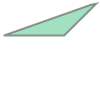

In [9]:
data.iloc[0].geometry

In [10]:
type(data.iloc[0].geometry.centroid.coords.xy)

tuple

In [11]:
x,y = data.iloc[0].geometry.centroid.coords.xy
print(x[0], y[0])

100.3523806215463 13.681909895687259


In [12]:
def get_centroid(row):
    x,y = row.geometry.centroid.coords.xy
    return [y[0], x[0], row.gid]

In [13]:
locations = data.apply(get_centroid, axis=1)
locations[:10].values.tolist()

[[13.681909895687259, 100.3523806215463, 1],
 [13.681065179586984, 100.35734881960266, 2],
 [13.835387759268324, 100.31704683135784, 3],
 [13.835374071450508, 100.32025616400968, 4],
 [13.835263422886362, 100.31450049961144, 5],
 [13.970958691795444, 100.35439431568562, 6],
 [14.012678811906719, 100.277541916121, 7],
 [13.825413527559498, 100.34523981226017, 8],
 [13.835192443348355, 100.32401663170351, 9],
 [13.832833356110099, 100.34497316341634, 10]]

In [14]:
MAX_RECORDS = 1000

In [15]:
m = folium.Map(location=[14.069446, 100.603271], zoom_start=10)
cluster = FastMarkerCluster(locations[:MAX_RECORDS].values.tolist())
m.add_child(cluster)
m

Use callback with javascript syntax to modify markers

https://leafletjs.com/

In [16]:
callback = """\
function (row) {
    var marker;
    marker = L.marker(new L.LatLng(row[0], row[1])).bindPopup('gid: ' + row[2].toString());
    return marker;
};
"""

m = folium.Map(location=[14.069446, 100.603271], zoom_start=10)
cluster = FastMarkerCluster(locations[:MAX_RECORDS].values.tolist(), callback=callback)
m.add_child(cluster)
m

## Apply to all files

In [17]:
m = folium.Map(location=[14.069446, 100.603271], zoom_start=10)

MAX_RECORDS = 1000
for f in sorted(file_list)[:2]:
    print('Read: ' + f)
    data = gpd.read_file(f, encoding='utf-8')
    locations = data.apply(get_centroid, axis=1)
    
    cluster = FastMarkerCluster(locations[:MAX_RECORDS].values.tolist(), callback=callback, name=os.path.basename(f))
    m.add_child(cluster)

folium.LayerControl().add_to(m)
m

Read: ../DOAE spatial data/ภัยน้ำท่วม/area1.shp
Read: ../DOAE spatial data/ภัยน้ำท่วม/area2.shp


In [18]:
m.save('./output/flood_62.html')